
# Introduction

This exercise is divided into two parts. In the first part, you'll learn how to use Tensorflow, a deep learning framework, to build your own Neural Networks. In the second part, you'll use the skills you acquired in the first part to build and train a neural net which predicts credit score of a person.

__Important Note__

If you don't know how to use Jupyter Environment, pay attention to the instructions being given in the classroom. This notebook is divided into cells; some cells are already filled in for you which are out of the scope of this workshop. The ones you're required to fill will have the following structure.

    ### START CODE HERE ###
    
    # Write code here...
    
    ### END CODE HERE ###

You simply have to delete the line that says _# Write code here..._ and start writing your code between _### START CODE HERE ###_ and _### END CODE HERE ###_ blocks. In case of any questions, ask instructor.

## TensorFlow Tutorial

Programing frameworks can not only shorten your coding time, but sometimes also perform optimizations that speed up your code. 
In this practical exercise, you will learn to do the following in TensorFlow: 

- Initialize variables
- Start your own session
- Train algorithms

### 1 - Installing the Tensorflow Library

First of all, you will install the library by typing into a terminal/command line.

    pip install tensorflow

You'd also be needing other helper libraries to load and preprocess data.
    
    pip install numpy
    
    pip install pandas
    
    pip install matplotlib

To start, you will __import__ all the necessary libraries.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(1)

Now that you have imported the library, we will walk you through its different applications. You will start with an example, where we compute for you the squared error loss. 
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [3]:
y_hat = tf.constant(36, name='y_hat')            # Define y_hat constant. Set to 36.
y = tf.constant(39, name='y')                    # Define y. Set to 39

loss = tf.Variable((y - y_hat)**2, name='loss')  # Create a variable for the loss

init = tf.global_variables_initializer()         # When init is run later (session.run(init)),
                                                 # the loss variable will be initialized and ready to be computed
with tf.Session() as session:                    # Create a session and print the output
    session.run(init)                            # Initializes the variables
    print(session.run(loss))                     # Prints the loss

9


Writing and running programs in TensorFlow has the following steps:

1. Create Tensors (variables) that are not yet executed/evaluated. 
2. Write operations between those Tensors.
3. Initialize your Tensors. 
4. Create a Session. 
5. Run the Session. This will run the operations you'd written above. 

Therefore, when we created a variable for the loss, we simply defined the loss as a function of other quantities, but did not evaluate its value. To evaluate it, we had to run `init=tf.global_variables_initializer()`. That initialized the loss variable, and in the last line we were finally able to evaluate the value of `loss` and print its value.

Now let us look at an easy example. Run the cell below:

In [4]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


As expected, you will not see 20! You got a tensor saying that the result is a tensor that does not have the shape attribute, and is of type "int32". All you did was put in the 'computation graph', but you have not run this computation yet. In order to actually multiply the two numbers, you will have to create a session and run it.

In [5]:
sess = tf.Session()
print(sess.run(c))

20


Great! To summarize, **remember to initialize your variables, create a session and run the operations inside the session**. 

Next, you'll also have to know about placeholders. A placeholder is an object whose value you can specify only later. 
To specify values for a placeholder, you can pass in values by using a "feed dictionary" (`feed_dict` variable). Below, we created a placeholder for x. This allows us to pass in a number later when we run the session. 

In [6]:
# Change the value of x in the feed_dict

x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()

6


When you first defined `x` you did not have to specify a value for it. A placeholder is simply a variable that you will assign data to only later, when running the session. We say that you **feed data** to these placeholders when running the session. 

Here's what's happening: When you specify the operations needed for a computation, you are telling TensorFlow how to construct a computation graph. The computation graph can have some placeholders whose values you will specify only later. Finally, when you run the session, you are telling TensorFlow to execute the computation graph.

#### 1.1 - Logit Calculation

Lets start this exercise by computing the following equation: $Y = WX + b$, where $W$ and $X$ are random matrices and b is a random vector. Below are examples of the functions you'll be needing to complete this exercise.

In [7]:
# Random vector
np.random.randn(4)

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862])

In [9]:
# Random Matrix
np.random.randn(2,3)

array([[ 1.46210794, -2.06014071, -0.3224172 ],
       [-0.38405435,  1.13376944, -1.09989127]])

In [10]:
# Addition with tensorflow
x1 = tf.constant(5, name="x1")
x2 = tf.constant(15, name="x2")
operation = tf.add(x1,x2)
with tf.Session() as sess:
    result = sess.run(operation)
print(result)

20


In [11]:
# Matrix Multiplication: Shapes (2,1), (1,2)
x1 = tf.constant([[2],[1]], name="x1")
x2 = tf.constant([[2,1]], name="x2")
operation = tf.matmul(x1,x2)
with tf.Session() as sess:
    result = sess.run(operation)
print(result)

[[4 2]
 [2 1]]


**Exercise**: Compute $WX + b$ where $W, X$, and $b$ are drawn from a random normal distribution. W is of shape (4, 3), X is (3,1) and b is (4,1). As an example, here is how you would define a constant X that has shape (3,1):
```python
X = tf.constant(np.random.randn(3,1), name = "X")

```

In [ ]:
# GRADED FUNCTION: linear_function

def compute_logits():
    """
    Implements a linear function: 
            Initializes W to be a random tensor of shape (4,3)
            Initializes X to be a random tensor of shape (3,1)
            Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result -- runs the session for Y = WX + b 
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (4 lines of code)

    ### END CODE HERE ### 
    
    # Create the session using tf.Session() and run it with sess.run(...) on the variable you want to calculate
    
    ### START CODE HERE ###

    ### END CODE HERE ### 
    
    # close the session 
    sess.close()

    return result

In [ ]:
print( "result = " + str(compute_logits()))

***Expected Output***: 

<table> 
<tr> 
<td>
**result**
</td>
<td>
[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]
</td>
</tr> 

</table> 

#### 1.2 - Computing the sigmoid function
Great! You just implemented a linear function. Tensorflow offers a variety of commonly used neural network functions like `tf.sigmoid` and `tf.nn.relu`. For this exercise lets compute the sigmoid function of an input. 

You will do this exercise using a placeholder variable `x`. When running the session, you should use the feed dictionary to pass in the input `z`. In this exercise, you will have to (i) create a placeholder `x`, (ii) define the operations needed to compute the sigmoid using `tf.sigmoid`, and then (iii) run the session. 

** Exercise **: Implement the sigmoid function below. You should use the following: 

- `tf.placeholder(tf.float32, name = "...")`
- `tf.sigmoid(...)`
- `sess.run(..., feed_dict = {x: z})`


Note that there are two typical ways to create and use sessions in tensorflow: 

**Method 1:**
```python
sess = tf.Session()
# Run the variables initialization (if needed), run the operations
result = sess.run(..., feed_dict = {...})
sess.close() # Close the session
```
**Method 2:**
```python
with tf.Session() as sess: 
    # run the variables initialization (if needed), run the operations
    result = sess.run(..., feed_dict = {...})
    # This takes care of closing the session for you :)
```

In [14]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    results -- the sigmoid of z
    """
    
    ### START CODE HERE ### ( approx. 4 lines of code)
    # Create a placeholder for x. Name it 'x'.
    x = tf.placeholder(tf.float32, name="x")

    # compute sigmoid(x)
    sigmoid = tf.sigmoid(x)

    # Create a session, and run it. Please use the method 2 explained above. 
    # You should use a feed_dict to pass z's value to x. 
    with tf.Session() as sess:
        # Run session and call the output "result"
        result = sess.run(sigmoid, feed_dict={x:z})
    
    ### END CODE HERE ###
    
    return result

In [15]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


<font color='blue'>

**To summarize, you now know how to**:

1. Create placeholders
2. Specify the computation graph corresponding to operations you want to compute
3. Create the session
4. Run the session, using a feed dictionary if necessary to specify placeholder variables' values. 

#### 1.3 -  Computing the Cost

**Exercise**: Implement the mean squared loss. This is the loss function to use for a regression problem. The function you will use is: 

- `tf.reduce_mean(tf.square(prediction-label))`

Your code should input `prediction` and compute the cost $MSE$.


In [17]:
# GRADED FUNCTION: cost

def cost(predictions, labels):
    """
    Computes the cost using the MSE
    
    Arguments:
    predictions --  z, output of the last linear unit
    label -- y, actual output
    
    Returns:
    cost -- runs the session of the cost
    """
    
    ### START CODE HERE ### 
    
    # Create the placeholders for "logits" (z) and "labels" (y) (approx. 2 lines)
    z = tf.placeholder(tf.float32, name="z")
    y= tf.placeholder(tf.float32, name="y")
    
    # Use the loss function (approx. 1 line)
    cost = tf.reduce_mean(tf.square(z-y))
    
    # Create a session (approx. 1 line). See method 1 above.
    sess = tf.Session()
    
    # Run the session (approx. 1 line).
    cost = sess.run(cost, feed_dict={z: predictions, y: labels})
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    ### END CODE HERE ###
    
    return cost

In [18]:
c = cost(np.array([4.0, 3.0, 3.5]), np.array([7.0, 6.0, 0.5]))
print ("cost = " + str(c))

cost = 9.0


***Expected Output***

<table> 
    <tr> 
        <td>
            **cost**
        </td>
        <td>
        9.0
        </td>
    </tr>

</table>

#### 1.4 - Initialize with zeros and ones

Now you will learn how to initialize a vector of zeros and ones. The function you will be calling is `tf.ones()`. To initialize with zeros you could use `tf.zeros()` instead. These functions take in a shape and return an array of dimension shape full of zeros and ones respectively. 

**Exercise:** Implement the function below to take in a shape and to return an array (of the shape's dimension of ones). 

 - tf.ones(shape)


In [19]:
# GRADED FUNCTION: ones

def ones(shape):
    """
    Creates an array of ones of dimension shape
    
    Arguments:
    shape -- shape of the array you want to create
        
    Returns: 
    ones -- array containing only ones
    """
    
    ### START CODE HERE ###
    
    # Create "ones" tensor using tf.ones(...). (approx. 1 line)
    ones = tf.ones(shape)
    
    # Create the session (approx. 1 line)
    with tf.Session() as sess:
    
        # Run the session to compute 'ones' (approx. 1 line)
        ones = sess.run(ones)
    
    ### END CODE HERE ###
    return ones

In [20]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


***Expected Output:***

<table> 
    <tr> 
        <td>
            **ones**
        </td>
        <td>
        [ 1.  1.  1.]
        </td>
    </tr>

</table>

## Part II. Credit Scoring

### 1 - Overview of the data set

First of all, we'll load the data. After loading, here's a basic overview;

- a training set of 72161 examples labeled as probability of default (y=1) or (y=0)
- a test set of 48108 examples labeled as probability of default (y=1) or (y=0)

In [21]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [22]:
train.head()

,ID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,ProbabilityOfDefaultIn2Yrs
0,27210,1.007600,58,0,0.272414,6100.0,4,0,1,0,0.0,0
1,111313,0.000000,28,1,0.000000,1400.0,3,0,0,2,1.0,0
2,81273,0.496533,49,0,0.595890,5401.0,13,0,1,0,0.0,0
3,31484,0.007353,75,0,0.002999,3333.0,7,0,0,0,0.0,0
4,26170,0.315109,54,1,0.150281,10333.0,8,0,0,0,0.0,0


In [23]:
x_train = train.drop("ProbabilityOfDefaultIn2Yrs", axis=1)
y_train = train["ProbabilityOfDefaultIn2Yrs"]
x_test = test.drop("ProbabilityOfDefaultIn2Yrs", axis=1)
y_test = test["ProbabilityOfDefaultIn2Yrs"]

### 2 - Data preprocessing

Common steps for pre-processing a new dataset are:

- Figure out the dimensions of the dataset
- Check for Null Values
- Check if data types of predictors are appropriate
- Drop identity columns
- Arrange examples in columns

In [24]:
x_train.shape, y_train.shape

((72161, 11), (72161,))

In [25]:
x_test.shape, y_test.shape

((48108, 11), (48108,))

In [26]:
x_train.isnull().sum()

ID                                      0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [27]:
x_train.dtypes

ID                                        int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [28]:
x_train.drop("ID", axis=1, inplace=True)
x_test.drop("ID", axis=1, inplace=True)

In [29]:
x_train.shape, x_test.shape

((72161, 10), (48108, 10))

In [30]:
x_train_final = x_train.values.T
x_test_final = x_test.values.T

In [31]:
y_train_final = y_train.values.reshape(1, y_train.count())
y_test_final = y_test.values.reshape(1, y_test.count())

In [32]:
x_train_final.shape, y_train_final.shape

((10, 72161), (1, 72161))

In [33]:
x_test_final.shape, y_test_final.shape

((10, 48108), (1, 48108))

### 3 - Create placeholders

Your first task is to create placeholders for `X` and `Y`. This will allow you to later pass your training data in when you run your session. 

**Exercise:** Implement the function below to create the placeholders in tensorflow. 

In [34]:
# GRADED FUNCTION: create_placeholders

def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, dimension of a training example = 10
    n_y -- scalar, dimension of output = 1
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the output labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    ### START CODE HERE ### (approx. 2 lines)
    X = tf.placeholder(tf.float32, shape=(n_x, None), name="X")
    Y = tf.placeholder(tf.float32, shape=(n_y, None), name="Y")
    ### END CODE HERE ###
    
    return X, Y

In [35]:
X, Y = create_placeholders(10, 1)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X_4:0", shape=(10, ?), dtype=float32)
Y = Tensor("Y_2:0", shape=(1, ?), dtype=float32)


**Expected Output**: 

<table> 
    <tr> 
        <td>
             **X**
        </td>
        <td>
        Tensor("Placeholder_1:0", shape=(10, ?), dtype=float32) (not necessarily Placeholder_1)
        </td>
    </tr>
    <tr> 
        <td>
            **Y**
        </td>
        <td>
        Tensor("Placeholder_2:0", shape=(1, ?), dtype=float32) (not necessarily Placeholder_2)
        </td>
    </tr>

</table>

### 4 - Initializing the parameters

Your second task is to initialize the parameters in tensorflow. We'll be using the following architecture for our model.

    input (10 * 1) -> layer 1 (5 neurons, relu) -> layer 2 (10 neurons, relu) -> layer 3 (1 neurons, sigmoid)

**Exercise:** Implement the function below to initialize the parameters in tensorflow. You are going use Xavier Initialization for weights and Zero Initialization for biases. The shapes are given below. As an example, to help you, for W1 and b1 you could use: 

```python
W1 = tf.get_variable("W1", [5,10], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [5,1], initializer = tf.zeros_initializer())
```

_For W1, we have 5 neurons, each having 10 weight values (bacause we have 10 inputs at layer 1). For b1, we have the same 5 neurons with 1 bias value._

Please use `seed = 1` to make sure your results match ours.

In [36]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [5, 10]
                        b1 : [5, 1]
                        W2 : [10, 5]
                        b2 : [10, 1]
                        W3 : [1, 10]
                        b3 : [1, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)
    W1 = tf.get_variable("W1", [5,10], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [5,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [10,5], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [10,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [1,10], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [1,1], initializer = tf.zeros_initializer())
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [37]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(5, 10) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(5, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(10, 5) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(10, 1) dtype=float32_ref>


**Expected Output**: 

<table> 
    <tr> 
        <td>
            **W1**
        </td>
        <td>
         < tf.Variable 'W1:0' shape=(5, 10) dtype=float32_ref >
        </td>
    </tr>
    <tr> 
        <td>
            **b1**
        </td>
        <td>
        < tf.Variable 'b1:0' shape=(5, 1) dtype=float32_ref >
        </td>
    </tr>
    <tr> 
        <td>
            **W2**
        </td>
        <td>
        < tf.Variable 'W2:0' shape=(10, 5) dtype=float32_ref >
        </td>
    </tr>
    <tr> 
        <td>
            **b2**
        </td>
        <td>
        < tf.Variable 'b2:0' shape=(10, 1) dtype=float32_ref >
        </td>
    </tr>

</table>

As expected, the parameters haven't been evaluated yet.

### 5 - Forward propagation in tensorflow 

You will now implement the forward propagation module in tensorflow. The function will take in a dictionary of parameters and it will complete the forward pass. The functions you will be using are: 

- `tf.add(...,...)` to do an addition
- `tf.matmul(...,...)` to do a matrix multiplication
- `tf.nn.relu(...)` to apply the ReLU activation

**Question:** Implement the forward pass of the neural network. We commented for you the numpy equivalents so that you can compare the tensorflow implementation to numpy. It is important to note that the forward propagation stops at `z3`. The reason is that in tensorflow the last linear layer output is given as input to the function computing the loss. Therefore, you don't need `a3`!

In [38]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ### START CODE HERE ### (approx. 5 lines)
    Z1 = tf.add(tf.matmul(W1, X), b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)
    ### END CODE HERE ###
    
    return Z3

In [39]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(10, 1)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(1, ?), dtype=float32)


**Expected Output**: 

<table> 
    <tr> 
        <td>
            **Z3**
        </td>
        <td>
        Tensor("Add_2:0", shape=(1, ?), dtype=float32)
        </td>
    </tr>

</table>

### 6 - Compute cost

As seen before, it is very easy to compute the cost using:
```python
tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=..., labels=...))
```
**Question**: Implement the cost function below. 

- `tf.reduce_mean` basically does the mean operation over individual losses of examples.

In [40]:
# GRADED FUNCTION: compute_cost 

def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (1, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.sigmoid_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=labels))
    ### END CODE HERE ###
    
    return cost

In [41]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(10, 1)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


**Expected Output**: 

<table> 
    <tr> 
        <td>
            **cost**
        </td>
        <td>
        Tensor("Mean:0", shape=(), dtype=float32)
        </td>
    </tr>

</table>

### 7 - Calculating Accuracy

Although there are functions available to compute accuracy & other metrics in deep learning frameworks, we'll be writing our own function here for learning purposes.

For a classification problem, accuracy of a model is the number of correctly classified examples divided by number of total examples. i.e.

    accuracy = TP + TN / N

Where `TP` is number of true positives, `TN` is the number of true negatives, `N` is the number of all examples in the dataset.

In [42]:
def calculate_accuracy(z, y):
    z_array = np.array(z).T
    y_array = np.array(y).T
    yhat_labels = (z_array > 0.5).astype(np.int)
    correct_labels = np.sum(y_array == yhat_labels)
    accuracy = correct_labels/y_array.shape[0]
    return accuracy

### 8 - Backward propagation & parameter updates

This is where you become grateful to programming frameworks. All the backpropagation and the parameters update is taken care of in 1 line of code. It is very easy to incorporate this line in the model.

After you compute the cost function. You will create an "`optimizer`" object. You have to call this object along with the cost when running the tf.session. When called, it will perform an optimization on the given cost with the chosen method and learning rate.

For instance, for gradient descent the optimizer would be:
```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
```

To make the optimization you would do:
```python
_ , c = sess.run([optimizer, cost], feed_dict={X: X, Y: Y})
```

This computes the backpropagation by passing through the tensorflow graph in the reverse order. From cost to inputs.

**Note** When coding, we often use `_` as a "throwaway" variable to store values that we won't need to use later. Here, `_` takes on the evaluated value of `optimizer`, which we don't need (and `c` takes the value of the `cost` variable). 

### 9 - Building the model

Now, you will bring it all together! 

**Exercise:** Implement the model. You will be calling the functions you had previously implemented.

In [43]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001, num_epochs = 500, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 10, number of training examples = 72161)
    Y_train -- test set, of shape (output size = 2, number of training examples = 72161)
    X_test -- training set, of shape (input size = 10, number of training examples = 48108)
    Y_test -- test set, of shape (output size = 2, number of test examples = 48108)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    train_acc = []                                    # To keep track of the training accuracy
    test_acc = []                                     # To keep track of the test accuracy
    
    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_x, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z3, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use GradientDescentOptimizer.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):
            seed = seed + 1

            ### START CODE HERE ### (1 line)
            _, c = sess.run([optimizer, cost], feed_dict={X: X_train, Y: Y_train})
            ### END CODE HERE ###
            
            epoch_cost = c                # Defines a cost related to an epoch
            
            epoch_train_Z = sess.run(Z3, feed_dict={X: X_train})
            epoch_train_accuracy = calculate_accuracy(epoch_train_Z, Y_train)
            epoch_test_Z = sess.run(Z3, feed_dict={X: X_test})
            epoch_test_accuracy = calculate_accuracy(epoch_test_Z, Y_test)
            
            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                train_acc.append(epoch_train_accuracy)
                test_acc.append(epoch_test_accuracy)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        # plot train vs. test accuracy over training epochs
        plt.figure(figsize=(13,7))
        plt.plot(np.squeeze(train_acc), color="red")
        plt.plot(np.squeeze(test_acc), color="blue")
        plt.ylabel('Accuracy')
        plt.xlabel('iterations (per tens)')
        plt.title("Training Accuracy (Red) vs. Test Accuracy (Blue) Trend")
        plt.show()
        
        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Accuracy
        train_Z = sess.run(Z3, feed_dict={X: X_train})
        train_accuracy = calculate_accuracy(train_Z, Y_train)
        test_Z = sess.run(Z3, feed_dict={X: X_test})
        test_accuracy = calculate_accuracy(test_Z, Y_test)

        print ("Train Accuracy:", train_accuracy)
        print ("Test Accuracy:", test_accuracy)
        
        return parameters

Cost after epoch 0: 17.964821
Cost after epoch 100: 1.002736
Cost after epoch 200: 0.986673
Cost after epoch 300: 0.971593
Cost after epoch 400: 0.957571


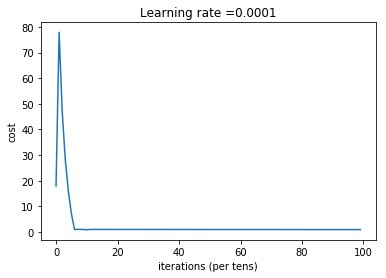

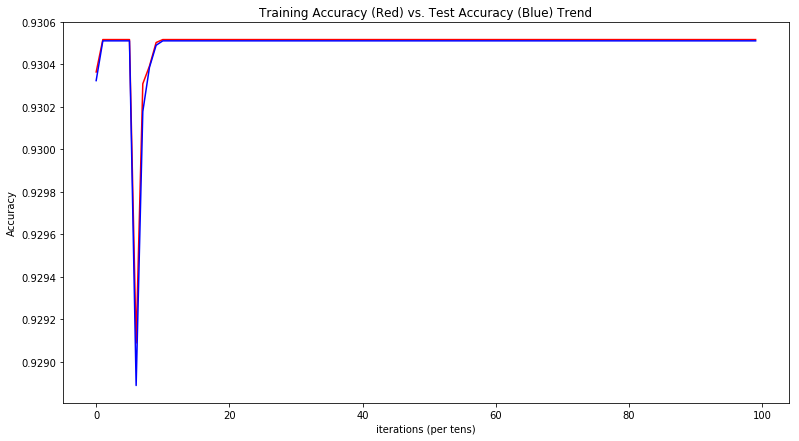

Parameters have been trained!
Train Accuracy: 0.9305164839733374
Test Accuracy: 0.930510518001164


In [44]:
parameters = model(x_train_final, y_train_final, x_test_final, y_test_final)

**Expected Output**:

<table> 
    <tr> 
        <td>
            **Train Accuracy**
        </td>
        <td>
        0.9305164839733374
        </td>
    </tr>
    <tr> 
        <td>
            **Test Accuracy**
        </td>
        <td>
        0.930510518001164
        </td>
    </tr>

</table>

Amazing, your algorithm can predict the probability if a person will default or not.